In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wind_data = pd.read_csv('wind_data.csv')
wind_data = wind_data[wind_data.columns[1:]]
wind_data.head()

,plant_id,plant,op,op_id,plant_state,region,rpm,fuel_type,fuel_usage,net_gen
0,1,Sand Point,"TDX Sand Point Generating, LLC",63560,AK,PACN,WT,WND,3045,347.0
1,90,Snake River,Nome Joint Utility Systems,13642,AK,PACN,WT,WND,20906,2383.0
2,508,Lamar Plant,City of Lamar - (CO),10633,CO,MTN,WT,WND,116085,13232.0
3,692,Medicine Bow,SRIV Partnership LLC,62042,WY,MTN,WT,WND,141429,16121.0
4,944,Geneseo,City of Geneseo - (IL),7095,IL,ENC,WT,WND,51368,5855.0


In [3]:
def plant_type(row):
    if row == 'WT':
        output = 'Onshore'
    if row == 'WS':
        output = 'Offshore'
    return output

In [4]:
wind_data['rpm'] = wind_data['rpm'].apply(plant_type)

In [5]:
wind_data.groupby('plant_state')['op_id'].count().sort_values(ascending=False).head(5)

plant_state
TX    190
MN    129
CA    114
IA    112
OK     57
Name: op_id, dtype: int64

In [15]:
operator_counts = pd.concat([wind_data.groupby('plant_state')['op_id'].count().sort_values(ascending=False).head(10)])


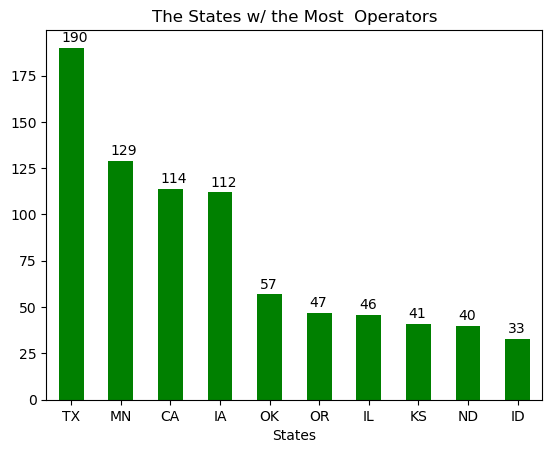

In [16]:
op_counts_bar = operator_counts.plot(kind='bar', title='The States w/ the Most  Operators', color='green', xlabel='States', rot=0)
for p in op_counts_bar.patches:
    op_counts_bar.annotate(str(p.get_height()), (p.get_x() + 0.05, p.get_height() + 3))
op_counts_bar.figure.savefig('op_counts_bar');

In [9]:
operator_regions = pd.concat([wind_data.groupby('region')['op_id'].count().sort_values(ascending=False).head(), wind_data.groupby('region')['op_id'].count().sort_values(ascending=False).tail()])


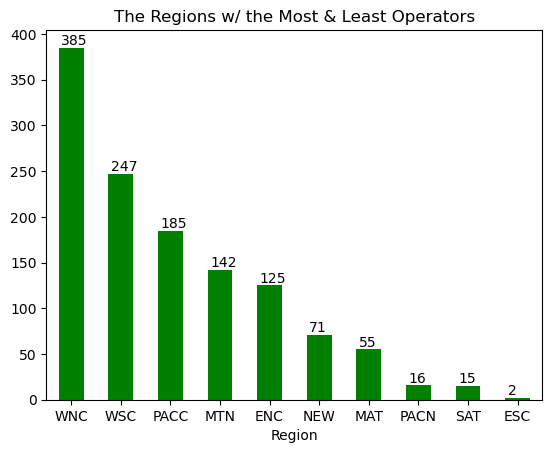

In [11]:
op_regions_bar = operator_regions.plot(kind='bar', title='The Regions w/ the Most & Least Operators', color='green', xlabel='Region', rot=0)
for p in op_regions_bar.patches:
    op_regions_bar.annotate(str(p.get_height()), (p.get_x() + 0.05, p.get_height() + 3))
op_regions_bar.figure.savefig('op_regions_bar');

In [12]:
operator_gen = pd.concat([wind_data.groupby(['plant_state'])['net_gen'].mean().sort_values(ascending=False).head(), wind_data.groupby('plant_state')['net_gen'].mean().sort_values(ascending=False).tail()])


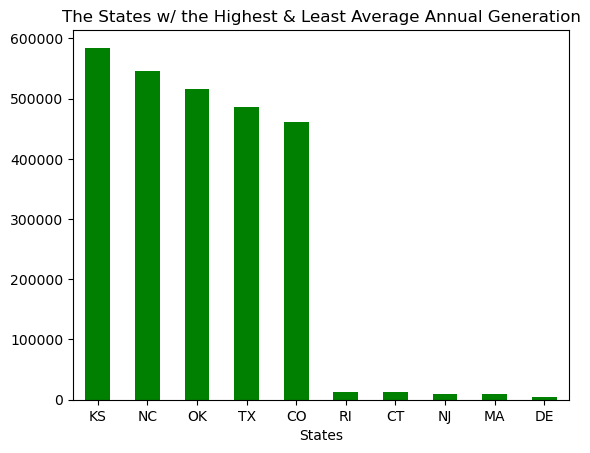

In [13]:
op_gen_bar = operator_gen.plot(kind='bar', title='The States w/ the Highest & Least Average Annual Generation', color='green', xlabel='States', rot=0)
op_gen_bar.figure.savefig('op_gen_bar');

In [52]:
rpm_gen = pd.concat([wind_data.groupby(['rpm'])['net_gen'].mean().sort_values(ascending=False).head(1), wind_data.groupby('rpm')['net_gen'].mean().sort_values(ascending=False).tail(1)])


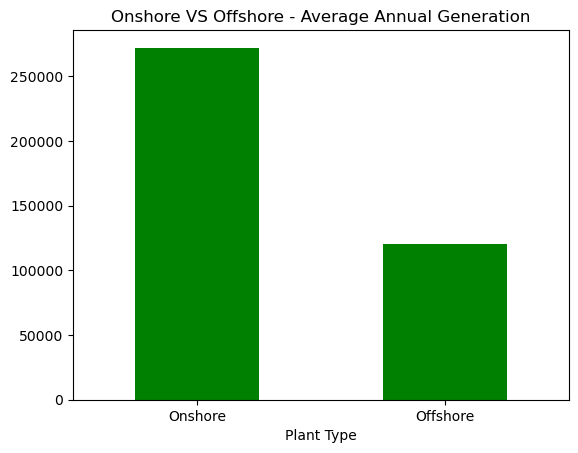

In [53]:
rpm_gen_bar = rpm_gen.plot(kind='bar', title='Onshore VS Offshore - Average Annual Generation', color='green', xlabel='Plant Type', rot=0)
rpm_gen_bar.figure.savefig('rpm_gen_bar');

In [54]:
manu_data = pd.read_csv('manu_data.csv')
manu_data = manu_data[manu_data.columns[1:]]
manu_data

,t_manu,t_model,t_cap,t_hh,t_rd,t_rsa,t_ttlh,t_conf_atr,case_id,size
0,Nordex,AW125/3000,3000.0,87.5,125.0,12271.85,150.0,3,3063272,large
1,Nordex,AW125/3000,3000.0,87.5,125.0,12271.85,150.0,3,3053390,large
2,Nordex,AW125/3000,3000.0,87.5,125.0,12271.85,150.0,3,3063269,large
3,Nordex,AW125/3000,3000.0,87.5,125.0,12271.85,150.0,3,3049500,large
4,Nordex,AW125/3000,3000.0,87.5,125.0,12271.85,150.0,3,3049502,large
...,...,...,...,...,...,...,...,...,...,...
64476,GE Wind,GE1.7-100,1700.0,80.0,100.0,7853.98,130.1,3,3057399,medium
64477,GE Wind,GE1.7-100,1700.0,80.0,100.0,7853.98,130.1,3,3057398,medium
64478,Northern Power Systems,NPS-100,100.0,37.0,21.0,346.36,47.5,3,3052682,small
64479,Seaforth,AOC15/65,65.0,30.5,15.0,176.71,38.0,1,3003325,small


In [55]:
import statistics as stat
median_height = stat.median(manu_data['t_rd'])
std_height = stat.stdev(manu_data['t_rd'])
def height_category(row):
    if row > median_height + std_height:
        outcome = 'large'
    elif row >= median_height - std_height:
        outcome = 'medium'
    else:
        outcome = 'small'
    return outcome

In [56]:
manu_data['size'] = manu_data['t_rd'].apply(height_category)

In [57]:
manu_data['size'].value_counts()

medium    43347
small     13258
large      7876
Name: size, dtype: int64

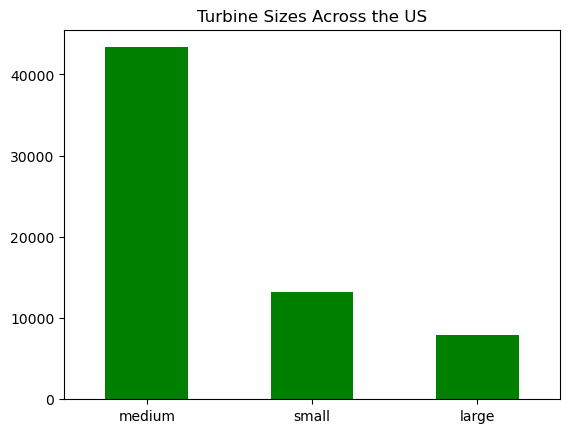

In [58]:
turbine_size_bar = manu_data['size'].value_counts().plot(kind='bar', title='Turbine Sizes Across the US', color='green', xlabel=None, rot=0)
turbine_size_bar.figure.savefig('turbine_size_bar');

In [59]:
manu_data.to_csv('manu_data.csv')

In [60]:
wind_turbines = pd.read_csv('wind_turbines.csv')
wind_turbines = wind_turbines[wind_turbines.columns[1:]]
wind_turbines

,case_id,t_state,t_county,t_fips,p_name,p_year,p_tnum,p_cap,retrofit,xlong,ylat
0,3072661,CA,Kern County,6029,251 Wind,1987.0,194,18.43,0,-118.363762,35.077908
1,3072695,CA,Kern County,6029,251 Wind,1987.0,194,18.43,0,-118.364410,35.077435
2,3072704,CA,Kern County,6029,251 Wind,1987.0,194,18.43,0,-118.364197,35.077644
3,3063272,IA,Story County,19169,30 MW Iowa DG Portfolio,2017.0,10,30.00,0,-93.430367,42.028233
4,3053390,IA,Boone County,19015,30 MW Iowa DG Portfolio,2017.0,10,30.00,0,-93.700424,41.977608
...,...,...,...,...,...,...,...,...,...,...,...
70803,3053232,NY,Wyoming County,36121,unknown Wyoming County,2016.0,1,NaN,0,-78.187935,42.740818
70804,3101958,TX,Young County,48503,unknown Young County,NaN,1,NaN,0,-98.907600,33.149414
70805,3040944,TX,Young County,48503,unknown Young County 1,2011.0,1,NaN,0,-98.551094,33.093292
70806,3055918,CO,Yuma County,8125,unknown Yuma County,2016.0,2,NaN,0,-102.716949,40.037548


In [61]:
turbine_sizes = pd.merge(left=wind_turbines, right=manu_data, how='left', on='case_id')
turbine_sizes.dropna(inplace=True)
turbine_sizes

,case_id,t_state,t_county,t_fips,p_name,p_year,p_tnum,p_cap,retrofit,xlong,ylat,t_manu,t_model,t_cap,t_hh,t_rd,t_rsa,t_ttlh,t_conf_atr,size
3,3063272,IA,Story County,19169,30 MW Iowa DG Portfolio,2017.0,10,30.000,0,-93.430367,42.028233,Nordex,AW125/3000,3000.0,87.5,125.0,12271.85,150.0,3.0,large
4,3053390,IA,Boone County,19015,30 MW Iowa DG Portfolio,2017.0,10,30.000,0,-93.700424,41.977608,Nordex,AW125/3000,3000.0,87.5,125.0,12271.85,150.0,3.0,large
5,3063269,IA,Story County,19169,30 MW Iowa DG Portfolio,2017.0,10,30.000,0,-93.632835,41.882477,Nordex,AW125/3000,3000.0,87.5,125.0,12271.85,150.0,3.0,large
6,3049500,IA,Story County,19169,30 MW Iowa DG Portfolio,2017.0,10,30.000,0,-93.515892,42.016373,Nordex,AW125/3000,3000.0,87.5,125.0,12271.85,150.0,3.0,large
7,3049502,IA,Story County,19169,30 MW Iowa DG Portfolio,2017.0,10,30.000,0,-93.518082,42.013630,Nordex,AW125/3000,3000.0,87.5,125.0,12271.85,150.0,3.0,large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67278,3057399,TX,El Paso County,48141,unknown El Paso County,2015.0,2,3.400,0,-106.405434,31.788124,GE Wind,GE1.7-100,1700.0,80.0,100.0,7853.98,130.1,3.0,medium
67279,3057398,TX,El Paso County,48141,unknown El Paso County,2015.0,2,3.400,0,-106.405670,31.788097,GE Wind,GE1.7-100,1700.0,80.0,100.0,7853.98,130.1,3.0,medium
67309,3052682,NY,Erie County,36029,unknown Erie County,2016.0,2,0.200,0,-78.931122,42.977005,Northern Power Systems,NPS-100,100.0,37.0,21.0,346.36,47.5,3.0,small
67913,3003325,AK,Northwest Arctic Borough,2188,unknown Kotzebue Wind Project,2003.0,15,0.975,0,-162.557327,66.834328,Seaforth,AOC15/65,65.0,30.5,15.0,176.71,38.0,1.0,small


In [62]:
turbine_sizes.to_csv('turbine_sizes.csv')